<a href="https://colab.research.google.com/github/byslavam/MAT422/blob/main/3_5_%26_3_6_K_Means_%26_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5: K-Means**
k-means clustering is a popular method of vector quantization that aims to
partition n observations into k clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster. It is an unsupervised learning algorithm that is used to cluster data.

Within-Cluster Sum of Squares (WCSS) $WWSC_i = Σ_{x∈S_i} = ||x_i-μ_j||^2$

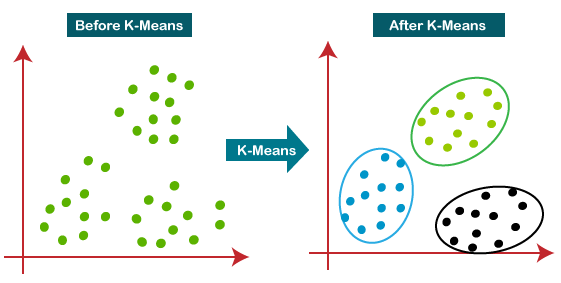

## **K-means Clustering Algorithm**
1. Clusters the data into k groups where k is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean
distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster
in consecutive rounds.



## **K-Means Demonstration**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


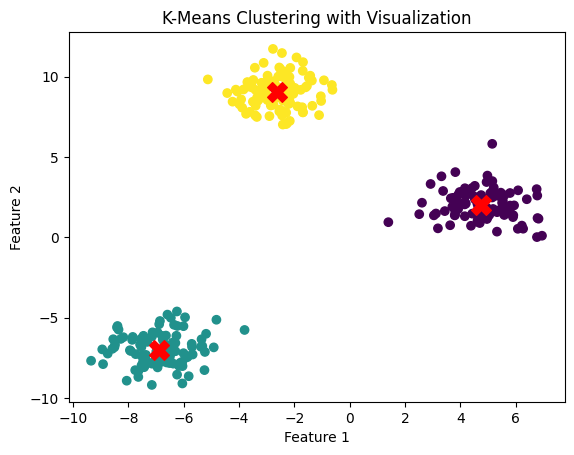

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Initialize K-Means with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# Fit the K-Means model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize the data and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Visualization')
plt.show()


# **3.6: Support Vector Machines**
Support-vector machines (SVMs) are supervised learning models in machine
learning, which aim to analyze data for classification and regression analy-
sis. Given a set of training examples, each marked as belonging to one of
two categories, an SVM training algorithm builds a model that assigns new
examples to one category or the other.

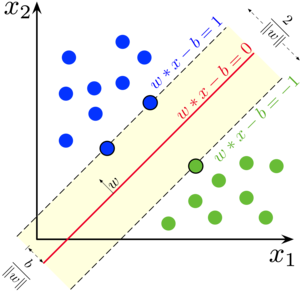

## **Hyperplane**
A hyperplane is a subspace of one dimension less than the ambient space it is embedded in. For example, a line in 2D space is a hyperplane in 3D space. It is used to separate the data into classes.

Hyperplane Equation: $w^Tx+b=0$

where:
-  $w$ is the normal vector of the hyperplane
- $b$ is the bias of the hyperplane
- $x$ is the sample

## **Margin**
The margin is the distance between the hyperplane and the closest data points.

The margin is defined as: $M = \frac{2}{||w||}$

where:
- $||w||$ is the norm of the normal vector

## **Support Vectors**
Support vectors are the data points that are closest to the hyperplane. The support vectors are defined as:

$S = {x_i∈X|y_i(w^Tx_i+b)=1}$

where:
- $X$ is the set of all samples
- $x_i$ is the i-th sample
- $y_i$ is the label of the i-th sample

## **Loss Function**
The loss function is used to measure the performance of the model. The loss function is defined as:

$L(w,b) = λ||w||^2+\frac{1}{n}Σ_{i=1}^nmax(0,1-y_i(w^Tx_i+b))$

where:
- $λ$ is the regularization parameter

## **SVM Demonstration**

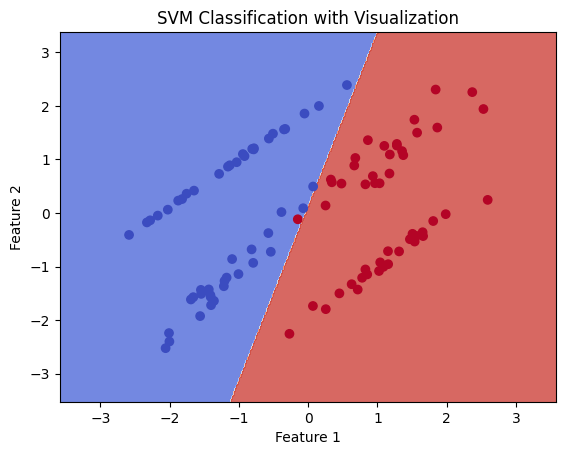

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Load a sample dataset for classification
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Initialize an SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)

# Fit the SVM model to the data
clf.fit(X, y)

# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for the mesh grid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Visualization')
plt.show()
